## Тарабонда Герман

### Задание №2

A) Оценим количество слагаемых в ряду:

Возьмем $R_n$, где $n$ такое, что $n^2-n-z > 0$. 

Тогда $|R_n| \leqslant \sum\limits_{k = n + 1}^\infty \frac{1}{k^2-k-z} \leqslant \sum\limits_{k = n + 1}^\infty \frac{1}{k^2-k-2} \leqslant \int\limits_{n}^\infty \frac{1}{k^2-k-2} = \frac{\ln{|x-2|}-\ln{|x+1|}}{3} \big|_{n}^\infty = \frac{\ln{|\frac{n+1}{n-2}|}}{3}$

Оценим какое нужно взять $n$:

$\frac{\ln{|\frac{n+1}{n-2}|}}{3} < \varepsilon \Rightarrow |\frac{n+1}{n-2}| < e^{3\varepsilon} \Rightarrow n > \frac{1 + 2e^{3\varepsilon}}{e^{3\varepsilon} - 1}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 1000001


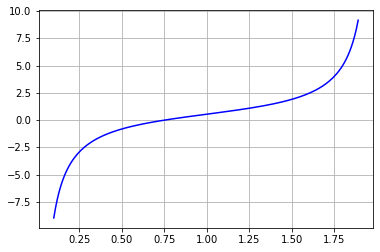

In [2]:
def count_n_a(eps: float) -> int:
    return math.ceil((1 + 2 * math.exp(3 * eps))/(math.exp(3 * eps) - 1))

def count_a(k: int, z: float) -> float:
    return 1 / (k * k - k - z)

def count_w_a(z: float, N: int) -> float:
    return sum([count_a(k + 1, z) for k in range(N)]) # k + 1, так как нумерация с нуля

N_a = count_n_a(1e-6)
print('N = ' + str(N_a))

#plot graphic
X = np.arange(0.1, 1.9, 0.01)
Y_a = [count_w_a(x, N_a) for x in X]
plt.plot(X, Y_a, color='blue')
plt.grid()

plt.show()

B) Возьмем ряд $\sum\limits_{k=1}^{\infty} b_k = \sum\limits_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}$

Так как $\lim_{k \rightarrow \infty} \frac{a_k}{b_k} = \lim_{k \rightarrow \infty} \frac{k^2}{k^2-k-z} = 1$, то можем использовать этот ряд для более быстрой сходимости

$\sum\limits_{k=1}^{\infty} \frac{1}{k^2-k-z} = \frac{\pi^2}{6} + \sum\limits_{k=1}^{\infty} \left( \frac{1}{k^2-k-z} - \frac{1}{k^2} \right) = \frac{\pi^2}{6} + \sum\limits_{k=1}^{\infty} \frac{k+z}{k^2(k^2-k-z)}$

Теперь оценим остаток:

$|R_n| \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+z}{k^2(k^2-k-z)}$

Так как производная положительна по $z$: $\left( \frac{k+z}{k^2-k-z} \right)' = \frac{k^2}{(k^2-k-z)^2} > 0$, то возьмем $z = 2$:

$|R_n| \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+z}{k^2(k^2-k-z)} \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+2}{k^2(k^2-k-2)} \leqslant  \int\limits_{n}^\infty \frac{k+2}{k^2(k^2-k-2)} = \frac{\ln{|x-2|}-\ln{|x+1|}}{3} + \frac{1}{x} \big|_{n}^\infty = \frac{\ln{|\frac{n+1}{n-2}|}}{3} - \frac{1}{n}$

И в итоге нам нужно подобрать такое $n$, что $\frac{\ln{|\frac{n+1}{n-2}|}}{3} - \frac{1}{n} < \varepsilon$

N = 709


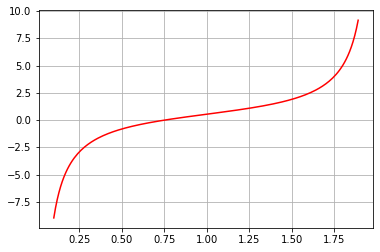

In [3]:
def count_n_b(eps: float) -> int:
    n = 100
    while not (math.log((n + 1)/(n - 2)) / 3 - 1 / n) < eps:
        n += 1
    return n

def count_b(k: int, z: float) -> float:
    return (k + z) / ((k * k) * (k * k - k - z))

def count_w_b(z: float, N: int) -> float:
    # k + 1, так как нумерация с нуля
    return (math.pi ** 2) / 6 + sum([count_b(k + 1, z) for k in range(N)])

N_b = count_n_b(1e-6)
print('N = ' + str(N_b))

#plot graphic
Y_b = [count_w_b(x, N_b) for x in X]
plt.plot(X, Y_b, color='red')
plt.grid()

plt.show()

C)

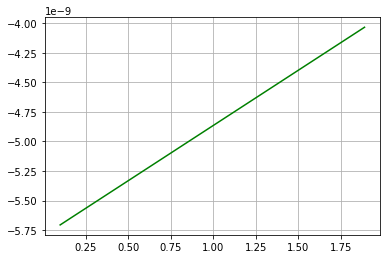

In [4]:
#plot graphic
Y = [count_w_a(x, N_a) - count_w_b(x, N_b) for x in X]
plt.plot(X, Y, color='green')
plt.grid()

plt.show()